## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# ***Capstone project: Hotel Booking Analysis***

In [1]:
#Importing library for Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the file in pandas 
data=("/content/drive/MyDrive/Copy of Hotel Bookings (1).csv")
data=pd.read_csv(data)

In [5]:
#checking the data and columns and information store in columns  
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# We have check rows and columns in data
data.shape

(119390, 32)

In [7]:
# We have to check if there are any NaN values present and how to we can replace that.
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# we can see that there is lot of NaN values in company column  so we can drop that
data=data.drop(['company'], axis=1) 

We can see that NaN values can cause damage to analysis ,we have to replace them best possible way.

In [9]:
data.shape

(119390, 31)

In [10]:
data.children.describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [11]:
# we have seen that the children column has min value equal to 0(zero) so it is assumed to be good choice we can replace it with zero
data["children"]=data['children'].fillna(0)

In [12]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [13]:
#As there many places where country is not specified so we can replace that with anonymous
data['country']=data[["country"]].fillna("Anonymous")

In [14]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [15]:
data["agent"].describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [16]:
# Here we can see that values of agent , as we dont know the agents related to hotels we can replace it with zero
data['agent']=data['agent'].fillna(0)

We can see that Agents and their data minumum number of agents is and maximum no of agents are 535 and as well the average number of agents are 86 to this hotels.

In [17]:
#Check whether there any NaN values in data
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [18]:
# let's see first what type hotel are there in data?
# How much the percentage of hotel in data?

In [19]:
data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

We found that there are two types hotels and their data is given in file 

In [20]:
data.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [21]:
labels=data['hotel'].value_counts().index.tolist()

In [22]:
labels

['City Hotel', 'Resort Hotel']

In [23]:
value_data=data['hotel'].value_counts().tolist()

In [24]:
value_data

[79330, 40060]

**Observation:1**
Here we are trying to show the % of bookings happend related to hotels and we found that there are there 66.6 % hotels are city hotels and 33.4 % hotels are Resort hotels.

Text(0.5, 1.0, 'City hotel and Resort hotel  bookings data')

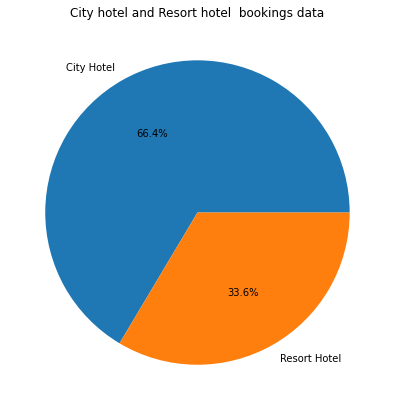

In [25]:
plt.figure(figsize=(10,7))
plt.pie(value_data,labels=labels,autopct='%1.1f%%')
plt.show
plt.title('City hotel and Resort hotel  bookings data')

In [26]:
data.lead_time.describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

**Observation:2**
 Lead time is duration between the time of booking and actual check in hotel.

so found that the 'mean' lead time' of hotel is 104 days and the 'min' lead time is 0 days and as well as 'maximum' lead time is 737 days 

In [27]:
# lead time = time between reservation and actual check in

In [28]:
booking=data.is_canceled.value_counts()

In [29]:
booking

0    75166
1    44224
Name: is_canceled, dtype: int64

In [30]:
data['is_canceled']=data.is_canceled.replace([0,1],['booked','canceled'])
booking_info=data.is_canceled.value_counts().index.tolist()
booking_info_nums=data.is_canceled.value_counts().tolist()

In [31]:
booking_data={'booking_info':booking_info,"booking_info_nums":booking_info_nums}

In [32]:
data.is_canceled.value_counts(normalize=True)

booked      0.629584
canceled    0.370416
Name: is_canceled, dtype: float64

**Observation:3**

62% people booked and checked in hotel 

38% people booked and didn't checked in hotel

In [33]:
pd.DataFrame(booking_data)

,booking_info,booking_info_nums
0,booked,75166
1,canceled,44224


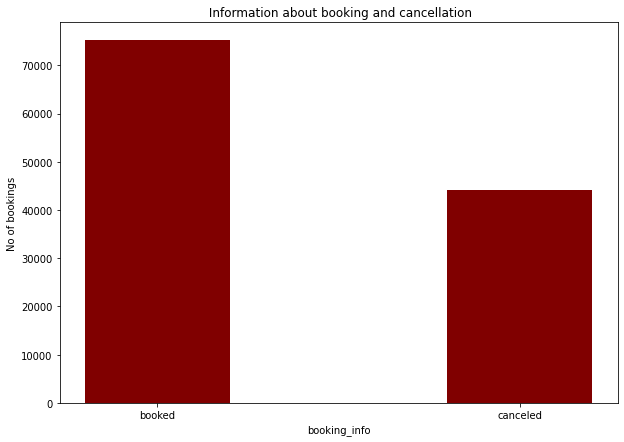

In [34]:
plt.figure(figsize=(10,7))
plt.bar(booking_info, booking_info_nums, color ='maroon',
        width = 0.4)
 
plt.xlabel("booking_info")
plt.ylabel("No of bookings")
plt.title(" Information about booking and cancellation")
plt.show()


In [35]:
data_year=data.arrival_date_year.unique()
data_year

array([2015, 2016, 2017])

In [36]:
data.arrival_date_year.value_counts()


2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [37]:
year_list=data.arrival_date_year.value_counts().index.tolist()
print(year_list)
year_bookings=data.arrival_date_year.value_counts().tolist()
print(year_bookings)

[2016, 2017, 2015]
[56707, 40687, 21996]


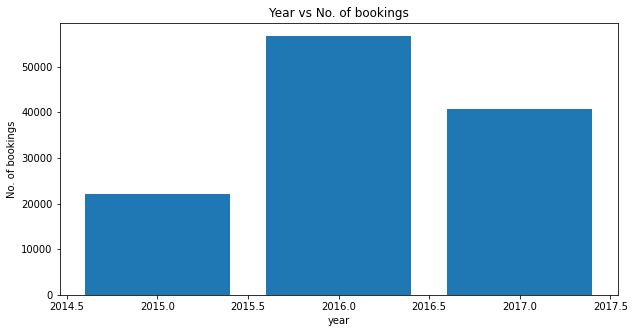

In [38]:
plt.figure(figsize = (10, 5))
plt.bar(year_list,year_bookings)
plt.xlabel("year")
plt.ylabel("No. of bookings")
plt.title("Year vs No. of bookings")
plt.show()


**Observation:4**

In above plot we can see that year and their corresponding bookings .



*  most bookings happend during the year 2016
* Then after that 2017 and followed by 2015






Text(0.5, 0, ' Year of bookings')

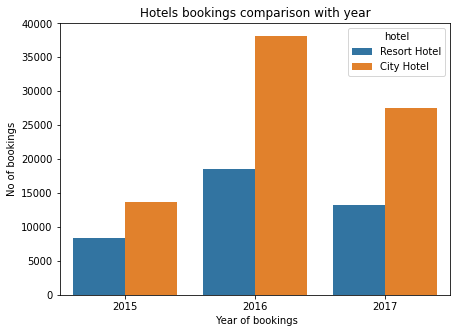

In [39]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=data);
plt.title('Hotels bookings comparison with year')
plt.ylabel('No of bookings')
plt.xlabel(' Year of bookings')

**Observation:5**

We can see from above graph that the performace of hotel respective to their year and bookings

*   By looking at graphs we can conclude that bookings were more happened in city hotels than resort hotels .



Text(0, 0.5, ' lead time occurance')

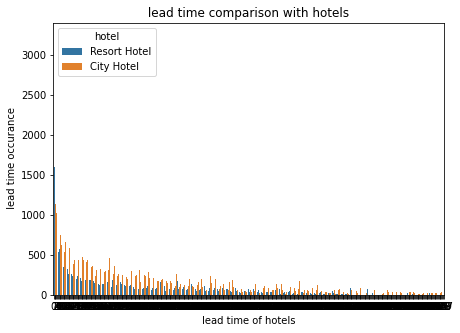

In [40]:
plt.subplots(figsize=(7,5))
sns.countplot(x='lead_time', hue='hotel',  data=data);
plt.title(' lead time comparison with hotels ')
plt.xlabel ('lead time of hotels')
plt.ylabel(' lead time occurance') 

**Observation:6**

we have compare the lead time data with the hotels and we found that the lead time is more in city hotel and less in resort hotels .

In [41]:
data.lead_time.describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Text(0, 0.5, 'No of bookings')

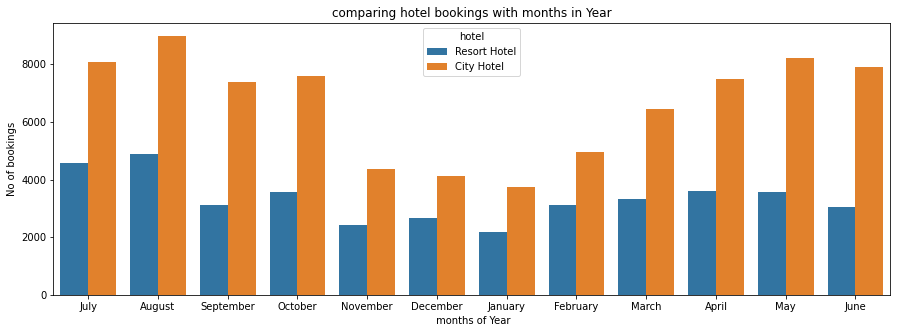

In [42]:
plt.subplots(figsize=(15,5))
sns.countplot(x='arrival_date_month', hue='hotel',  data=data);
plt.title('comparing hotel bookings with months in Year')
plt.xlabel(' months of Year')
plt.ylabel('No of bookings')

**Observation:7**

In above graph we can take few things that are ;

*   August month is amongs busiest amongs rest of the month both in city and resort hotels.
*   while january months is lowest visted by travles to city and Resort hotel.


*   We can see that certain pattern of bookings happens increasing towards from the january to august 
*   and after august months it start to fall again in booking to january





Text(0.5, 0, 'date of months')

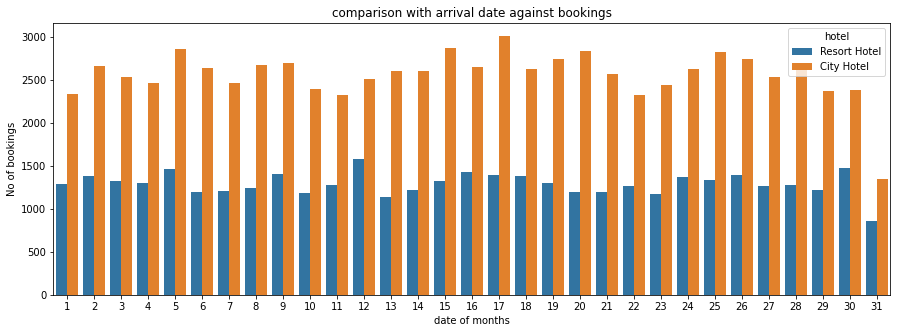

In [43]:
plt.subplots(figsize=(15,5))
sns.countplot(x='arrival_date_day_of_month', hue='hotel',  data=data);
plt.title ('comparison with arrival date against bookings')
plt.ylabel('No of bookings')
plt.xlabel('date of months')

**Observation:8**

* From above graph we can noticed the pattern of bookings
related month date we found that hotel booking rise certainly after 3-4 days between and we can say that mostly at weekends .

Text(0, 0.5, 'No of bookings')

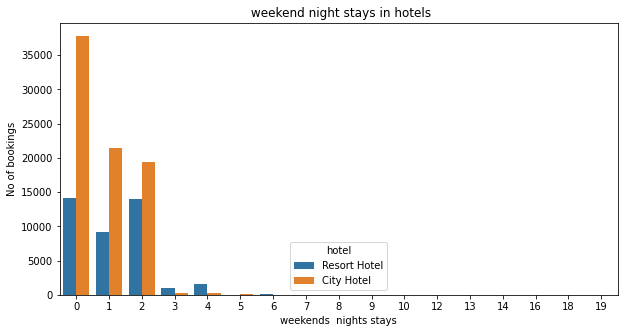

In [44]:
plt.subplots(figsize=(10,5))
sns.countplot(x='stays_in_weekend_nights', hue='hotel',  data=data);
plt.title(' weekend night stays in hotels')
plt.xlabel('weekends  nights stays')
plt.ylabel('No of bookings')

**Observation:9**

*  People who booked hotels for less than 2 at weekends they mostly stays in city hotel 
* people with more than 2 days mostly choose to stay at resort  hotel for weekends . 




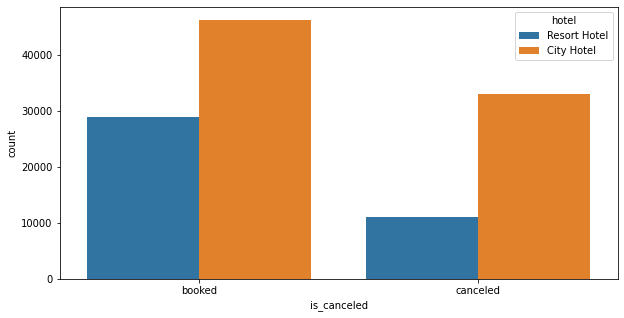

In [45]:
plt.subplots(figsize=(10,5))
sns.countplot(x='is_canceled', hue='hotel',  data=data);

**Observation:10**

*   In terms of booking % people choose city hotel so booking rate are  more in city hotel 
*  And cancelation rate is also more in city hotels



Text(0.5, 1.0, 'Meal comparison with hotels')

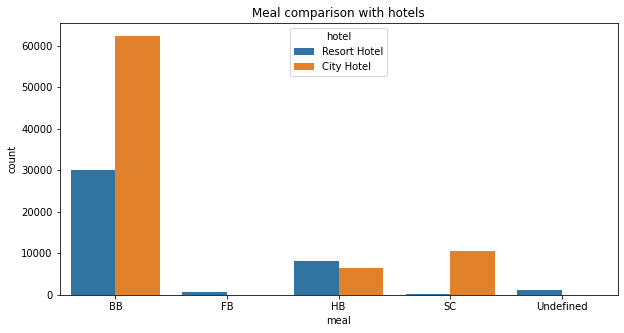

In [46]:
plt.subplots(figsize=(10,5))
sns.countplot(x='meal', hue='hotel',  data=data);
plt.title('Meal comparison with hotels')


**Observation:11**



*   BB (bed n breakfast) meal type prefered mostly in city hotel than Resort hotel in rest of all meal type 
* Next meal mostly prefered is **HB** (half board = breakfast+ dinner normally) and followed by **SC**( self catering) 



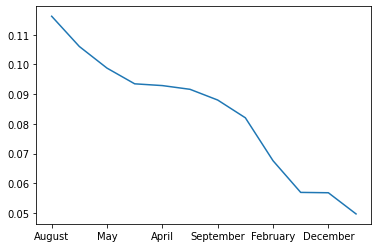

In [47]:
data.arrival_date_month.value_counts(normalize=True).plot(kind='line')

**Observation:12**

* Simple observation from above graph that booking trends related to hotel, in August it reaches to its peak and and december it is lowest. 

In [48]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [49]:
months_data=data.arrival_date_month.value_counts().reindex(months)
months_data

January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: arrival_date_month, dtype: int64

In [50]:
month_list=months_data.index
month_list

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [51]:
month_percentage=months_data/months_data.sum()*100
month_percentage.values


array([ 4.96607756,  6.7576849 ,  8.20336712,  9.28804758,  9.87603652,
        9.16240891, 10.60474077, 11.62325153,  8.80140715,  9.34751654,
        5.69059385,  5.67886758])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


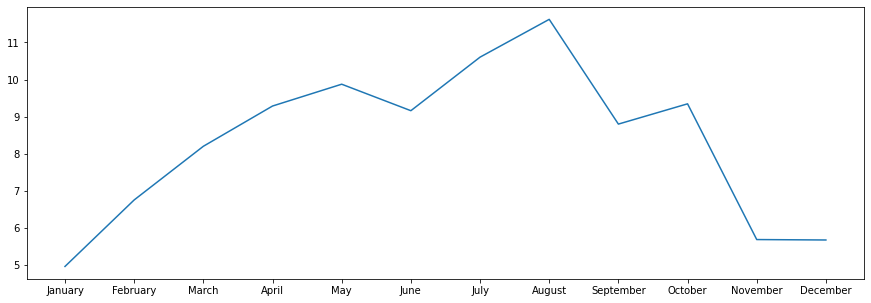

In [52]:
plt.figure(figsize=(15,5))
sns.lineplot(month_percentage.index,month_percentage.values, data=months_data)
plt.show()

**Observation:13**

* This graph is better showing the bookig trends

In [53]:
city_hotel_data=data.loc[data.hotel=='City Hotel' ]
city_hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,booked,6,2015,July,27,1,0,2,1,...,0,No Deposit,6.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,canceled,88,2015,July,27,1,0,4,2,...,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,canceled,65,2015,July,27,1,0,4,1,...,0,No Deposit,9.0,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,canceled,92,2015,July,27,1,2,4,2,...,0,No Deposit,9.0,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,canceled,100,2015,July,27,2,0,2,2,...,0,No Deposit,9.0,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,booked,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,booked,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,booked,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,booked,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x360 with 0 Axes>

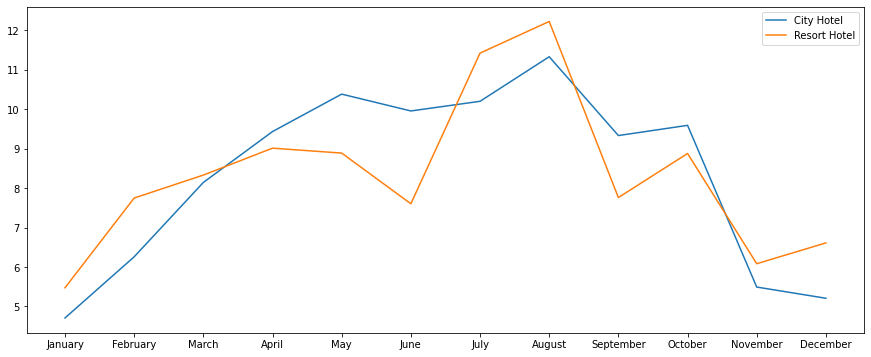

Text(0, 0.5, 'percentage of bookings')

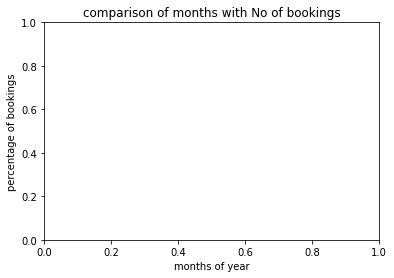

In [54]:
sorted_months =data.loc[data.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(months)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months =data.loc[data.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(months)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100
plt.figure(figsize=(15,5))
ax = plt.subplots(figsize=(15,6))
sns.lineplot(x1, y1.values, label='City Hotel')
sns.lineplot(x1, y2.values, label='Resort Hotel')

plt.show()
plt.title('comparison of months with No of bookings')
plt.xlabel('months of year')
plt.ylabel('percentage of bookings')

Observation:14

* Its seen that booking of the both hotel rise in august 
* its also seen that the people more likely choosen Resort hotels than city hotel in August.

In [55]:
travel_data=data.loc[data.is_canceled=='booked','country'].value_counts()
travel_data_top=travel_data.head(10)
travel_data_top
travel_data

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 166, dtype: int64

Text(0.5, 1.0, 'Top traveling countries')

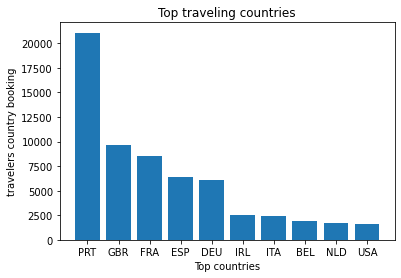

In [56]:
plt.bar(travel_data_top.index,travel_data_top.values,)
plt.ylabel("travelers country booking")
plt.xlabel("Top countries")
plt.title("Top traveling countries")

**Observation:15**

* Here we can see that the country have more booking is **Portugal**,followed by **Great britain** , **France** and so on spain,Germany,Ireland,Italy,belgium,Netherland,USA.

In [57]:
travel_data_top_frame=pd.DataFrame(travel_data_top)
travel_data_top_frame

,country
PRT,21071
GBR,9676
FRA,8481
ESP,6391
DEU,6069
IRL,2543
ITA,2433
BEL,1868
NLD,1717
USA,1596


Text(0, 0.5, ' no of bookings')

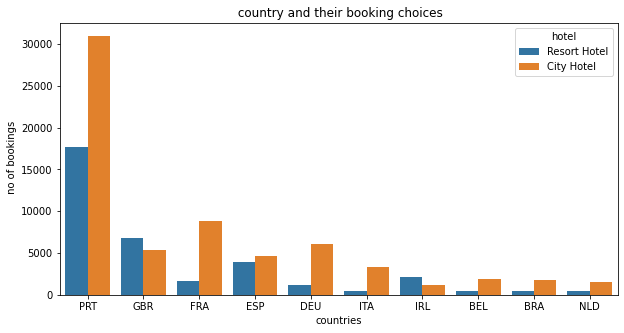

In [75]:

plt.subplots(figsize=(10,5))
sns.countplot(x='country', hue='hotel',  data=data,order=data.country.value_counts().iloc[:10].index);
plt.title(' country and their booking choices')
plt.xlabel('countries')
plt.ylabel(' no of bookings')

Observation:16

* Its shown from above bars that the people from Portugal likely to stay more in *City hotel* and opposite to that people of **great britain** is more likely to stay in *Resort hotel*

Text(0, 0.5, ' No of bookings')

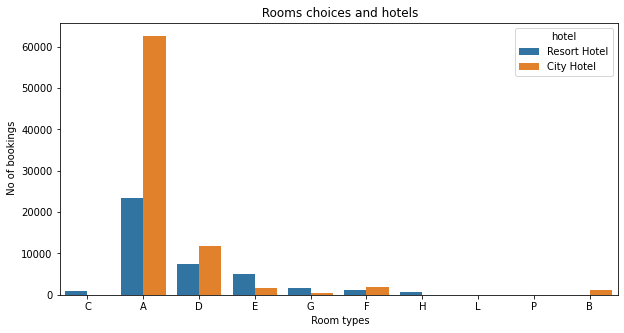

In [77]:
plt.subplots(figsize=(10,5))
sns.countplot(x='reserved_room_type', hue='hotel',  data=data);
plt.title(' Rooms choices and hotels')
plt.xlabel(" Room types")
plt.ylabel(' No of bookings')

**Observation:17**

* We can see that most of the customers choose the room type of A and and more likely in city hotels 
* Followed by the D,E F type of rooms

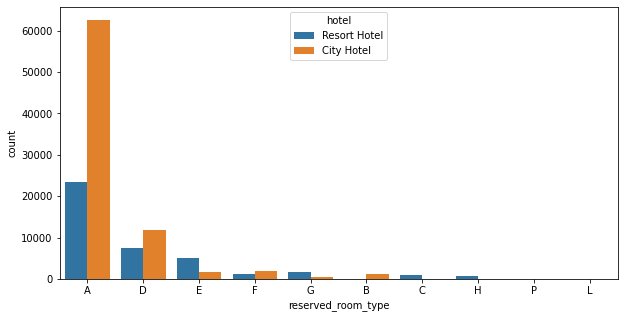

In [60]:
plt.subplots(figsize=(10,5))
sns.countplot(x='reserved_room_type', hue='hotel',  data=data,order=data.reserved_room_type.value_counts().iloc[:10].index);


Text(0.5, 0, 'Distribution channels')

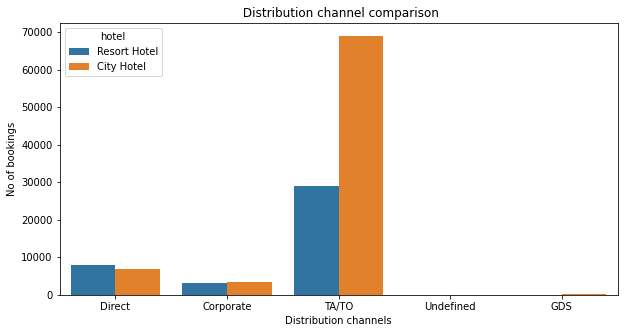

In [78]:
plt.subplots(figsize=(10,5))
sns.countplot(x='distribution_channel', hue='hotel',  data=data);
plt.title (' Distribution channel comparison')
plt.ylabel('No of bookings')
plt.xlabel('Distribution channels')

**Observation:18**

* Here , We can see that the TA/TO (travel agents/ tour operators) is TOP distribution channel amongs all and followed by the direct bookig and corporate bookings. 

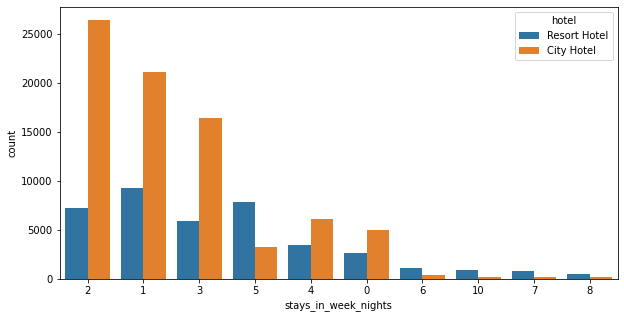

In [62]:
plt.subplots(figsize=(10,5))
sns.countplot(x='stays_in_week_nights', hue='hotel',  data=data,order=data.stays_in_week_nights.value_counts().iloc[:10].index);

**Observation:19**

* we can see that people with less than 3 nights are more likely stay in city hotels .
* we also see that people with more than 3 night stays are more like stay at Resort hotels.

Text(0, 0.5, 'No of bookings')

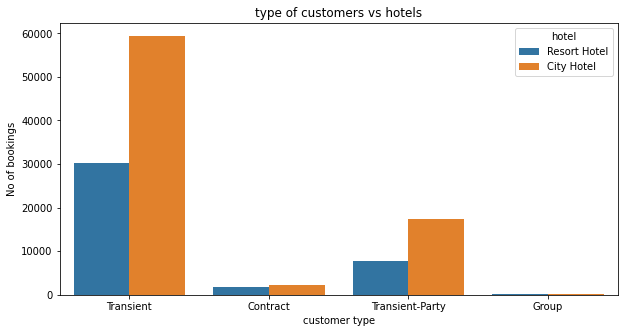

In [80]:
plt.subplots(figsize=(10,5))
sns.countplot(x='customer_type', hue='hotel',  data=data);
plt.title('type of customers vs hotels')
plt.xlabel('customer type')
plt.ylabel('No of bookings')

**Observation:20**

* we can see that the most of the customers in city and Resort hotel are from transient type and then followed by the transient party and contract type of customer.


Text(0, 0.5, 'no of occurance of waiting days')

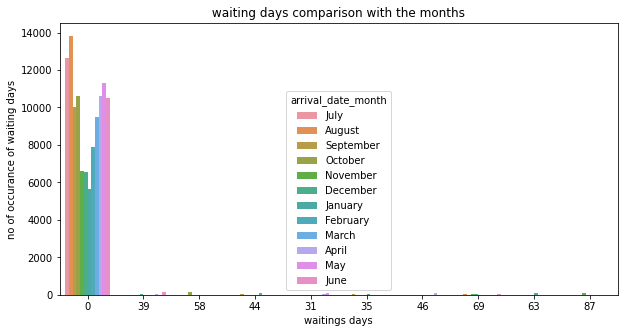

In [82]:
plt.subplots(figsize=(10,5))
sns.countplot(x='days_in_waiting_list', hue='arrival_date_month',  data=data,order=data.days_in_waiting_list.value_counts().iloc[:10].index);
plt.title(' waiting days comparison with the months ')
plt.xlabel('waitings days')
plt.ylabel ('no of occurance of waiting days')

**Observation:21**

* we can see that the waiting days in list is more in *August  and July* and less in *December* and *january*


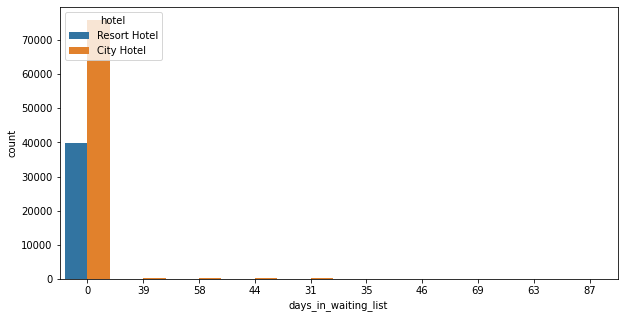

In [65]:
plt.subplots(figsize=(10,5))
sns.countplot(x='days_in_waiting_list', hue='hotel',  data=data,order=data.days_in_waiting_list.value_counts().iloc[:10].index);

Observation:22

* Waiting days are more in city hotels than Resort hotels.

In [66]:
booking_data=data.loc[data.is_canceled=='booked']

In [67]:
booking_data['assigned_same_rooms']=booking_data.loc[ booking_data['reserved_room_type'] == booking_data['assigned_room_type'] ] = 'assigned_same'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


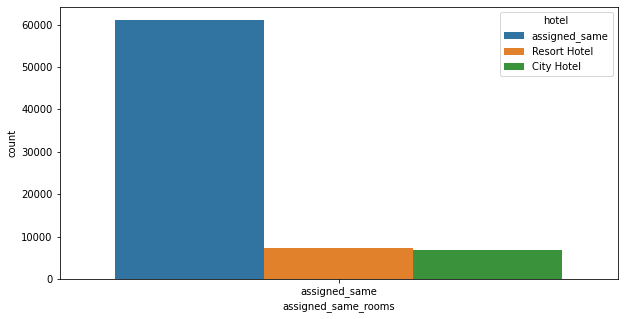

In [68]:
plt.subplots(figsize=(10,5))
sns.countplot(x='assigned_same_rooms', hue='hotel',  data=booking_data);

Observation:23

* We can see that chances of getting assigned same room is more in Resort hotel than city hotels.

In [69]:
data.adults.describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

Text(0.5, 1.0, 'comparison with the number of adults')

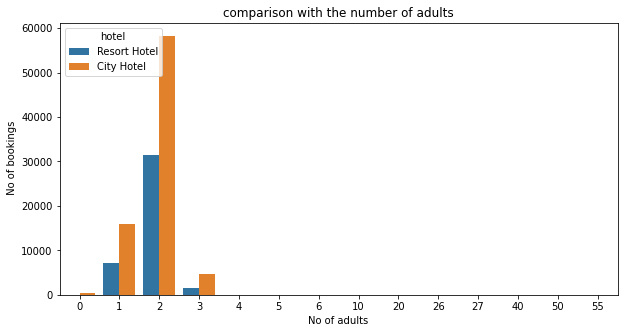

In [83]:
plt.subplots(figsize=(10,5))
sns.countplot(x='adults', hue='hotel',  data=data);
plt.xlabel('No of adults')
plt.ylabel(' No of bookings')
plt.title('comparison with the number of adults')

**Observation:24**

* Adults are more likely to stay in city hotels than the Resort hotels.

Text(0.5, 0, 'single consumer')

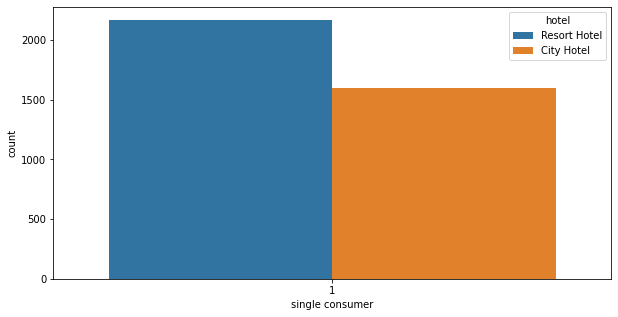

In [71]:
single  = booking_data[(booking_data.adults==1) & (booking_data.children==0) & (booking_data.babies==0)]
plt.subplots(figsize=(10,5))
sns.countplot(x='adults', hue='hotel',  data=single);
plt.xlabel('single consumer')

Observation:25

* single customer bookings are more in Resort hotel than city hotels.

Text(0.5, 1.0, 'couples and their hotel choices')

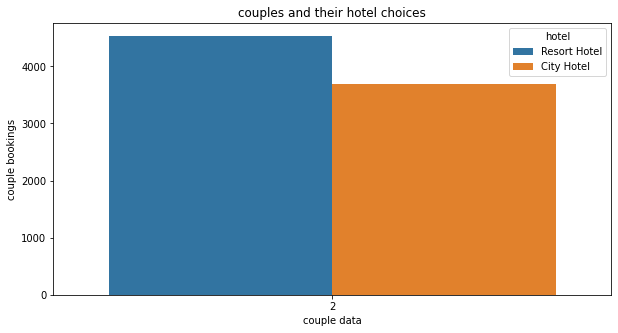

In [72]:
couple  = booking_data[(booking_data.adults==2) & (booking_data.children==0) & (booking_data.babies==0)]
plt.subplots(figsize=(10,5))
sns.countplot(x='adults', hue='hotel',  data=couple,);
plt.xlabel('couple data')
plt.ylabel('couple bookings')
plt.title("couples and their hotel choices")

Observation:26

* couples are more likely to stay in Resort hotel than the city hotels.

Text(0.5, 1.0, 'family and friends and their hotel choices')

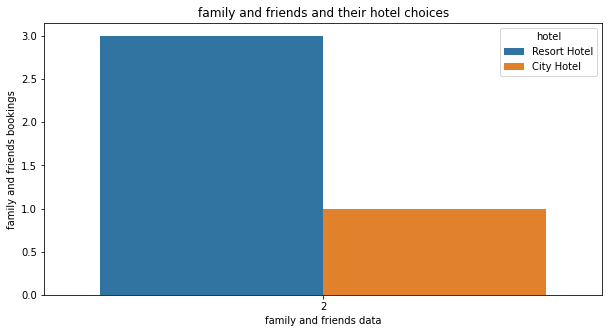

In [73]:
Family_or_friends  = booking_data[(booking_data.adults==2) + (booking_data.children==1) & (booking_data.babies==2)]
plt.subplots(figsize=(10,5))
sns.countplot(x='adults', hue='hotel',  data=Family_or_friends);
plt.xlabel('family and friends data')
plt.ylabel('family and friends bookings')
plt.title("family and friends and their hotel choices")


Observation:27

*  Family and Friends type of customer choosen to Resort hotels than the city hotels.

**Conclusion:**

>

*  66.4 % hotels are City hotels and 33.6 % are Resort Hotels.
*  62% is booking rate and 38% are cancelation rate
* city hotels have more cancelation rate and vice versa.
* Lead time is more in city hotels than the Resort hotels.
* August is busiest month and December is least busiest months.
* BB ( bed and breakfast) mostly prefered meal type in city and Resort hotels.
*Portugal, Great britain ,france are top three countries with most number of bookings.
*TA/TO is top performing distribution channel amongs rest of all.
*Both hotels have mostly transient type of customers.
* Chances of getting same assigned room is more in Resort hotel than city hotel.
*Bookings are mostly done by couples followed by family and friends and thereafter sigles.



